In [7]:
import pandas as pd
import numpy as np

snp_500 = pd.read_csv('snp500_history.csv',index_col='Date').tail(100)
snp_500_close_price = pd.DataFrame(snp_500.Close)

# 순서 매기기
snp_500_close_price['time'] = np.arange(len(snp_500.index))

snp_500_close_price

,Close,time
Date,,
2023-01-10 00:00:00-05:00,3919.250000,0
2023-01-11 00:00:00-05:00,3969.610107,1
2023-01-12 00:00:00-05:00,3983.169922,2
2023-01-13 00:00:00-05:00,3999.090088,3
2023-01-17 00:00:00-05:00,3990.969971,4
...,...,...
2023-05-26 00:00:00-04:00,4205.450195,95
2023-05-30 00:00:00-04:00,4205.520020,96
2023-05-31 00:00:00-04:00,4179.830078,97


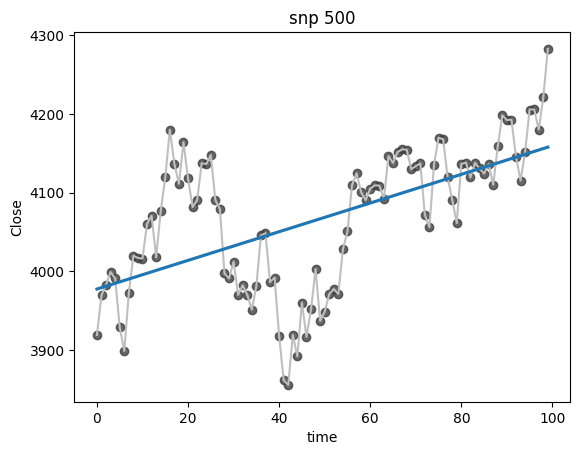

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot('time', 'Close', data=snp_500_close_price, color='0.75')
ax = sns.regplot(x='time', y='Close', data=snp_500_close_price, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('snp 500');

## Lag Feature (지연 피쳐)

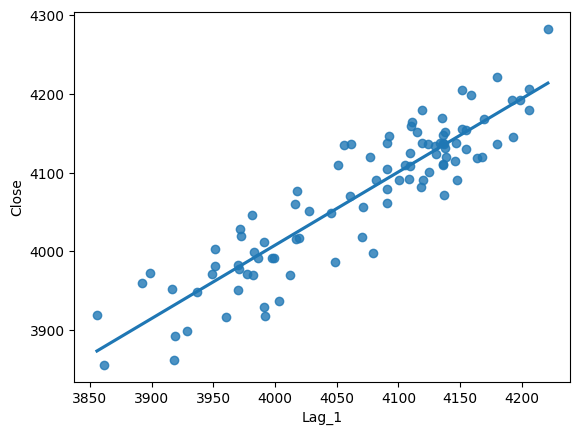

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

snp_500_close_price['Lag_1'] = snp_500_close_price['Close'].shift(1)
snp_500_close_price = snp_500_close_price.dropna()


snp_500_close_price[["Close","Lag_1"]]

sns.regplot(x="Lag_1", y="Close", data=snp_500_close_price, ci=None ); #회귀 플롯 그리기 ( 두 데이터의 상관성을 시각화 ) 

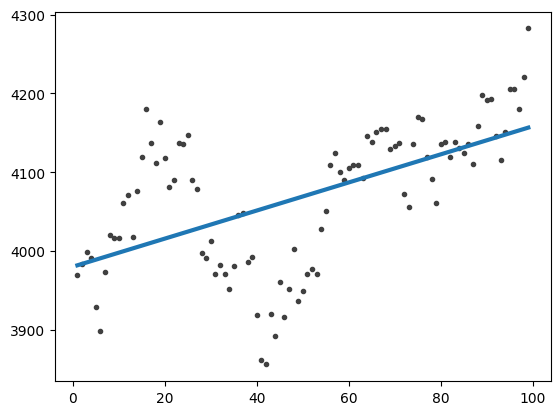

In [10]:
from sklearn.linear_model import LinearRegression

X = snp_500_close_price.loc[:,['time']]
y = snp_500_close_price.loc[:,'Close']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

plt.plot(X, y,'.', color='0.25');
plt.plot(X, y_pred, linewidth=3);


In [11]:
snp_500_close_price.dropna()

,Close,time,Lag_1
Date,,,
2023-01-11 00:00:00-05:00,3969.610107,1,3919.250000
2023-01-12 00:00:00-05:00,3983.169922,2,3969.610107
2023-01-13 00:00:00-05:00,3999.090088,3,3983.169922
2023-01-17 00:00:00-05:00,3990.969971,4,3999.090088
2023-01-18 00:00:00-05:00,3928.860107,5,3990.969971
...,...,...,...
2023-05-26 00:00:00-04:00,4205.450195,95,4151.279785
2023-05-30 00:00:00-04:00,4205.520020,96,4205.450195
2023-05-31 00:00:00-04:00,4179.830078,97,4205.520020


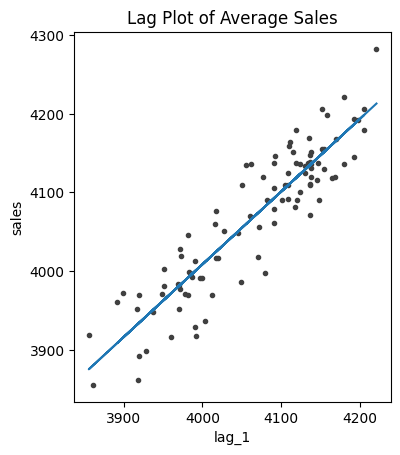

In [12]:
snp_500_close_price = snp_500_close_price
X = snp_500_close_price.loc[:,['Lag_1']]
y = snp_500_close_price.loc[:,'Close']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');
